# Visualise data using Sankey Diagram

Sankey diagrams typically depict the flow of data from one entity (or node) to another.
- The entity from/to where data flows is referred to as a node - the node where the flow originates is the source node and the where the flow ends is the target node.The source and target nodes are often represented as rectangles with a label.
- The flow itself is represented by a straight or a curved path is called the link. The width of the flow/link is proportional to the amount/quantity of flow. 
The Sankey diagrams can be used to represent the flow of energy, money, costs, anything that has a notion of flow.

## Plot a sample sankey diagram

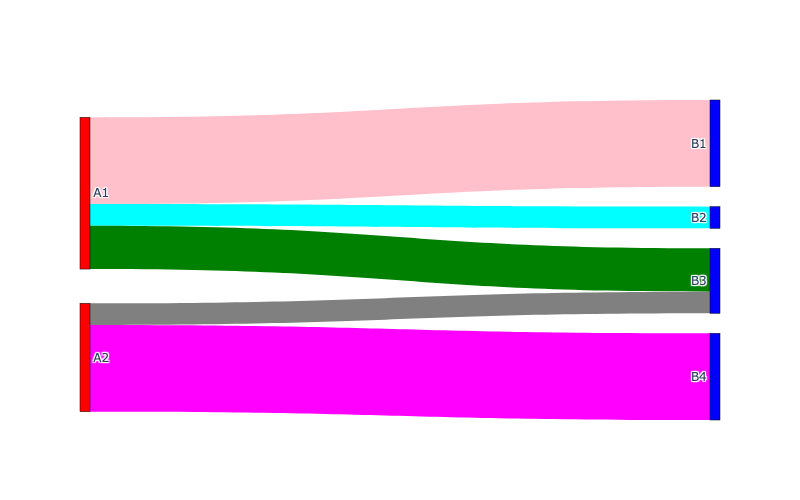

In [49]:
import plotly.graph_objects as go

source = [ 0, 0, 0, 1, 1]
target = [ 2, 3, 4, 4, 5]
value  = [ 8, 2, 4, 2, 8]

NODES = dict(pad  = 20, thickness = 10,
            line  = dict(color = "black", width = 0.5),
            label = ["A1", "A2", "B1", "B2", "B3", "B4"],
            color = ["red", "red", "blue", "blue", "blue", "blue"],)

LINKS = dict(source = source, target = target, value = value, 
            label = ["A1-B1", "A1-B2", "A1-B3", "A2-B3", "A2-B4"],
            color = ["pink", "cyan", "green", "grey", "magenta"],)

data = go.Sankey(node = NODES, link = LINKS)

fig = go.Figure(data)
fig.update_layout(width=800,height=500,)
fig.show("png") #fig.show()

## Plot Sankey diagram for the Olympics 2021 dataset

In [50]:
import pandas as pd
#import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

### Read and process the dataset
Let's use the [Olympics 2021](https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo) dataset to illustrate the use of Sankey diagram

In [51]:
df_medals = pd.read_excel("data/Medals.xlsx")
print(df_medals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           93 non-null     int64  
 1   Team/NOC       93 non-null     object 
 2   Gold           93 non-null     int64  
 3   Silver         93 non-null     int64  
 4   Bronze         93 non-null     int64  
 5   Total          93 non-null     int64  
 6   Rank by Total  93 non-null     int64  
 7   Unnamed: 7     0 non-null      float64
 8   Unnamed: 8     1 non-null      float64
dtypes: float64(2), int64(6), object(1)
memory usage: 6.7+ KB
None


- We need only the Rank, Country, Medals information. So, let's drop the Rank by Total and the Unnamed columns
- There is no missing data and no missing data handling is needed

In [52]:
df_medals.rename(columns={'Team/NOC':'Country', 'Total': 'Total Medals', 'Gold':'Gold Medals', 'Silver': 'Silver Medals', 'Bronze': 'Bronze Medals'}, inplace=True)
df_medals.drop(columns=['Unnamed: 7','Unnamed: 8','Rank by Total'], inplace=True)
df_medals

,Rank,Country,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,1,United States of America,39,41,33,113
1,2,People's Republic of China,38,32,18,88
2,3,Japan,27,14,17,58
3,4,Great Britain,22,21,22,65
4,5,ROC,20,28,23,71
...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1
89,86,Grenada,0,0,1,1
90,86,Kuwait,0,0,1,1
91,86,Republic of Moldova,0,0,1,1


### Display a basic Sankey diagram

We will use the plotly's go interface Sankey that takes 2 parameters – nodes and links.

Note that all the nodes - source and target should have unique identifiers. 

In this case, 
- the Source would be the country. Let's consider the top 3 countries (which are the USA, China and Japan) as the source nodes. Let's mark these source nodes with the following (unique) identifiers, labels and colours
    - 0: United States of America: green
    - 1: People's Republic of China: blue
    - 2: Japan: orange
- the Target would be the Gold, Silver and Bronze medals. Let's mark these target nodes with the following (unique) identifiers, labels and colours
    - 3: Gold: gold
    - 4: Silver: silver
    - 5: Bronze: brown
- the Link (between the source and target nodes) would be the number of medals of each kind (Gold, Silver, Bronze). From each source, we will have 3 links originating and each one ending in the target - Gold, Silver and Bronze. So we will have a total of 9 links. The width of each of the links should be the number of Gold, Silver and Bronze medals. Let's mark these links with the following source to target, values and colours
    - 0 (USA) to 3,4,5 : 39, 41, 33
    - 1 (China) to 3, 4, 5 : 38, 32, 18
    - 2 (Japan) to 3,4,5 : 27, 14, 17

We will need to instantiate 2 python dict objects to represent the
- nodes (both source and target): with labels & colours as individual lists and 
- links: source node, target node, value (width) and the colour of the links as individual lists
and pass this to the plotly's go interface Sankey. 

Each index of the lists – label, source, target, value and the color - corresponds to one node or link respectively.


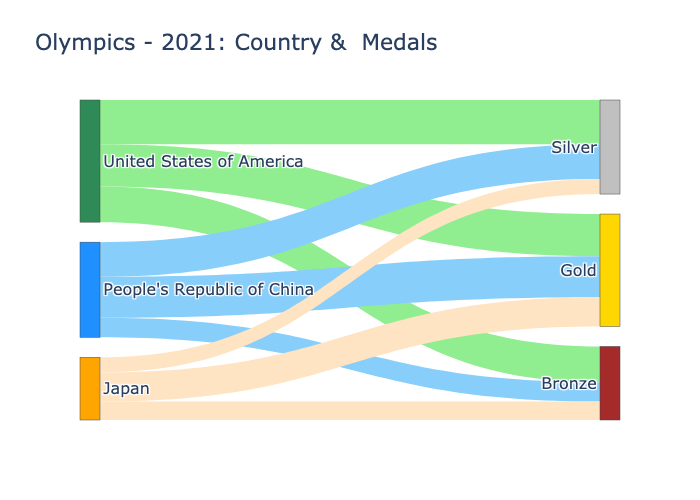

In [53]:
NODES = dict( #           0                               1                          2        3       4           5
            label = ["United States of America", "People's Republic of China",   "Japan", "Gold", "Silver", "Bronze"],
            color = ["seagreen",                 "dodgerblue",                  "orange", "gold", "silver", "brown" ],)

LINKS = dict(   source = [  0,  0,  0,  1,  1,  1,  2,  2,  2], # The origin or the source nodes of the link
                target = [  3,  4,  5,  3,  4,  5,  3,  4,  5], # The destination or the target nodes of the link
                value =  [ 39, 41, 33, 38, 32, 18, 27, 14, 17], # The width (quantity) of the links 
                # Color of the links 
                # Target Node:    3-Gold          4 -Silver        5-Bronze           
                color =     [   "lightgreen",   "lightgreen",   "lightgreen",      # Source Node: 0 - United States of America
                                "lightskyblue", "lightskyblue", "lightskyblue",    # Source Node: 1 - People's Republic of China
                                "bisque",       "bisque",       "bisque"],)        # Source Node: 2 - Japan

data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.update_layout(title="Olympics - 2021: Country &  Medals",  font_size=16)
fig.show("png") #fig.show()

# Colors are at https://developer.mozilla.org/en-US/docs/Web/CSS/color_value

Here we have a very basic plot. But do you notice how the diagram is too wide and Silver appears before the Gold? Let’s adjust the position of the nodes and the width.

### Adjust the order of the nodes and the width of the plot
Let's add the x and y positions for the nodes to explicitly specify the positions of the nodes. The values should be between 0 and 1.

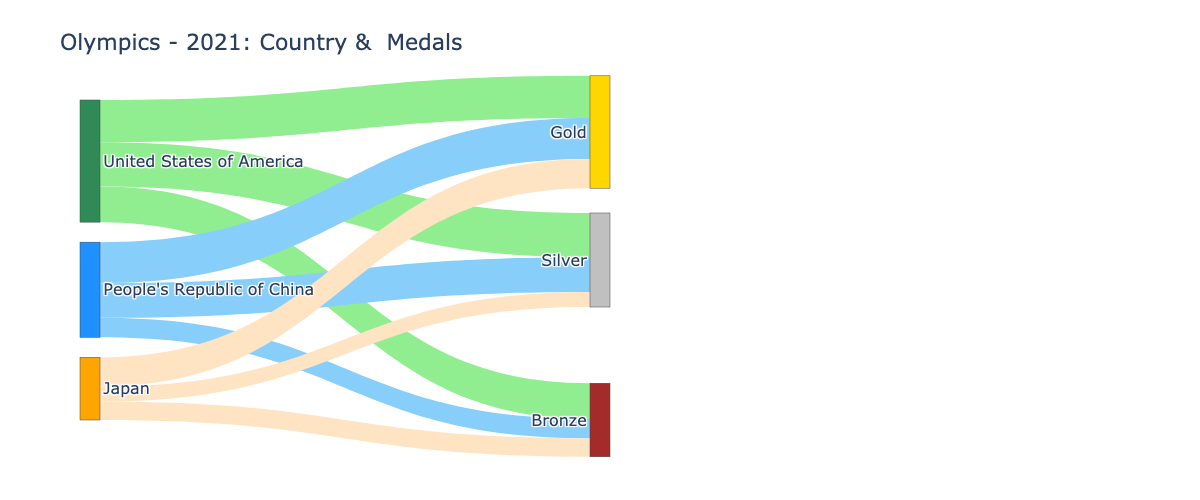

In [54]:
NODES = dict( #           0                               1                          2        3       4           5
            label = ["United States of America", "People's Republic of China",   "Japan", "Gold", "Silver", "Bronze"],
            color = [                "seagreen",                 "dodgerblue",  "orange", "gold", "silver", "brown" ],
            x     = [                         0,                            0,         0,    0.5,      0.5,      0.5],
            y     = [                         0,                          0.5,         1,    0.1,      0.5,        1],)
data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.update_layout(title="Olympics - 2021: Country &  Medals",  font_size=16, width=1200,height=500,)
fig.show("png") #fig.show()

### Improve the format of the hoverlabels
Currently, the information displayed in the hover labels is the default text. When you hover on the 
- nodes, the node name, the number of incoming flows, the number of outgoing flows and the total value is displayed. For instance, 
    - node United States of America has a total of 11 medals (=39 Gold + 41 Silver + 33 Bronze)
    - node Gold has  a total of 104 medals (= 39 from the  USA, 38 from China, 27 from Japan)
- links, the source node name and target node name and the value of the link is displayed. For instance, the link from the source node USA to the target node Silver has 39 medals. 

Don't you think the labels are too verbose? All these can be improved.

Let's improve the format of the hover labels using the hovertemplate parameter
- For the nodes, since the hoverlabels are not giving any new information than what is already present, let's take the hoverlabel off by passing an empty hovertemplate = " "
- For the links, we can make the label concise in the format <country>-<medal type>
- For both the nodes and links, let's have the values displayed with the suffix "Medals". e.g 113 Medals instead of just 113. This can be achieved by using the update_traces function with appropriate valueformat and valuesuffix.


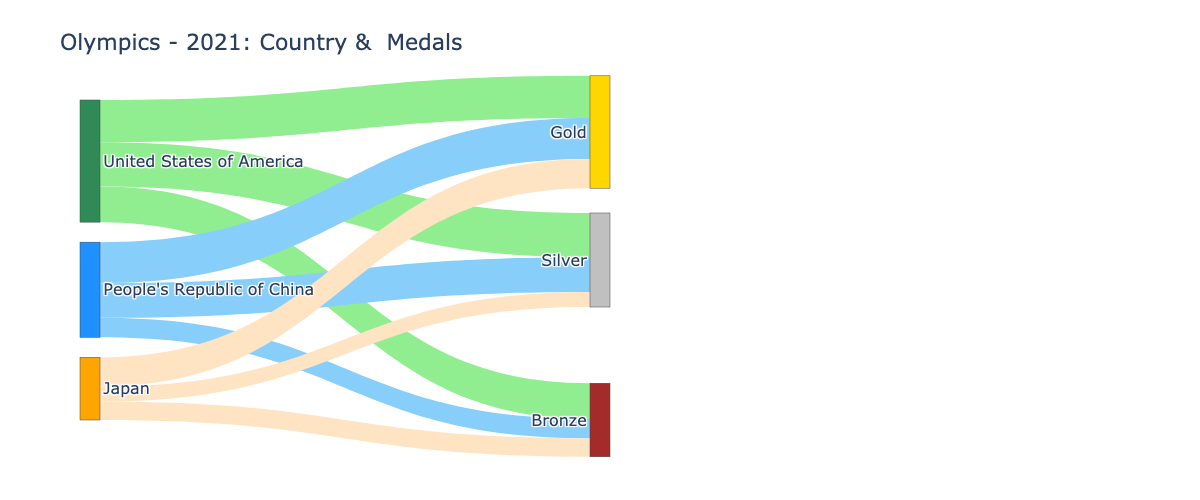

In [55]:
NODES = dict( #           0                               1                          2        3       4           5
            label = ["United States of America", "People's Republic of China",   "Japan", "Gold", "Silver", "Bronze"],
            color = [                "seagreen",                 "dodgerblue",  "orange", "gold", "silver", "brown" ],
            x     = [                         0,                            0,         0,    0.5,      0.5,      0.5],
            y     = [                         0,                          0.5,         1,    0.1,      0.5,        1],
            hovertemplate=" ",)

LINK_LABELS = []
for country in ["USA","China","Japan"]:
    for medal in ["Gold","Silver","Bronze"]:
        LINK_LABELS.append(f"{country}-{medal}")
LINKS = dict(   source = [  0,  0,  0,  1,  1,  1,  2,  2,  2], # The origin or the source nodes of the link
                target = [  3,  4,  5,  3,  4,  5,  3,  4,  5], # The destination or the target nodes of the link
                value =  [ 39, 41, 33, 38, 32, 18, 27, 14, 17], # The width (quantity) of the links 
                # Color of the links 
                # Target Node:    3-Gold          4 -Silver        5-Bronze           
                color =     [   "lightgreen",   "lightgreen",   "lightgreen",      # Source Node: 0 - United States of America
                                "lightskyblue", "lightskyblue", "lightskyblue",    # Source Node: 1 - People's Republic of China
                                "bisque",       "bisque",       "bisque"],         # Source Node: 2 - Japan
                label = LINK_LABELS, hovertemplate="%{label}",)

data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.update_layout(title="Olympics - 2021: Country &  Medals",  font_size=16, width=1200,height=500,)
fig.update_traces( valueformat='3d', valuesuffix=' Medals', selector=dict(type='sankey'))
fig.update_layout(hoverlabel=dict(bgcolor="lightgray",font_size=16,font_family="Rockwell"))
fig.show("png") #fig.show()

### Generalize for multiple nodes and levels
Nodes are referred to as source and target with respect to a link. A node that is a target for one link can be a source for another. 
- The code can be generalised to handle all the countries in the dataset.
- We can also extend the diagram to another level to visualize the total number of medals across the countries.

* Colors are at  https://developer.mozilla.org/en-US/docs/Web/CSS/color_value

In [56]:
NUM_COUNTRIES = 5
X_POS, Y_POS = 0.5, 1/(NUM_COUNTRIES-1)
NODE_COLORS = ["seagreen", "dodgerblue", "orange", "palevioletred", "darkcyan"]
LINK_COLORS = ["lightgreen", "lightskyblue", "bisque", "pink", "lightcyan"]

source = []
node_x_pos, node_y_pos = [], []
node_labels, node_colors = [], NODE_COLORS[0:NUM_COUNTRIES]
link_labels, link_colors, link_values = [], [], [] 

# FIRST set of links and nodes
for i in range(NUM_COUNTRIES):
    source.extend([i]*3)
    node_x_pos.append(0.01)
    node_y_pos.append(round(i*Y_POS+0.01,2))
    country = df_medals['Country'][i]
    node_labels.append(country) 
    for medal in ["Gold", "Silver", "Bronze"]:
        link_labels.append(f"{country}-{medal}")
        link_values.append(df_medals[f"{medal} Medals"][i])
    link_colors.extend([LINK_COLORS[i]]*3)

source_last = max(source)+1
target = [ source_last, source_last+1, source_last+2] * NUM_COUNTRIES
target_last = max(target)+1

node_labels.extend(["Gold", "Silver", "Bronze"])
node_colors.extend(["gold", "silver", "brown"])
node_x_pos.extend([X_POS, X_POS, X_POS])
node_y_pos.extend([0.01, 0.5, 1])

# LAST set of links and nodes
source.extend([ source_last, source_last+1, source_last+2])
target.extend([target_last]*3)
node_labels.extend(["Total Medals"])
node_colors.extend(["grey"])
node_x_pos.extend([X_POS+0.25])
node_y_pos.extend([0.5])

for medal in ["Gold","Silver","Bronze"]:
    link_labels.append(f"{medal}")
    link_values.append(df_medals[f"{medal} Medals"][:i+1].sum())
link_colors.extend(["gold", "silver", "brown"])

'''print("source", source, source_last); print("target", target)'''
print("node_labels", node_labels)
print("node_x_pos", node_x_pos); print("node_y_pos", node_y_pos)
'''; print("node_colors", node_colors)

print("link_labels", link_labels); print("link_values", link_values)'''

node_labels ['United States of America', "People's Republic of China", 'Japan', 'Great Britain', 'ROC', 'Gold', 'Silver', 'Bronze', 'Total Medals']
node_x_pos [0.01, 0.01, 0.01, 0.01, 0.01, 0.5, 0.5, 0.5, 0.75]
node_y_pos [0.01, 0.26, 0.51, 0.76, 1.01, 0.01, 0.5, 1, 0.5]


'; print("node_colors", node_colors)\n\nprint("link_labels", link_labels); print("link_values", link_values)'

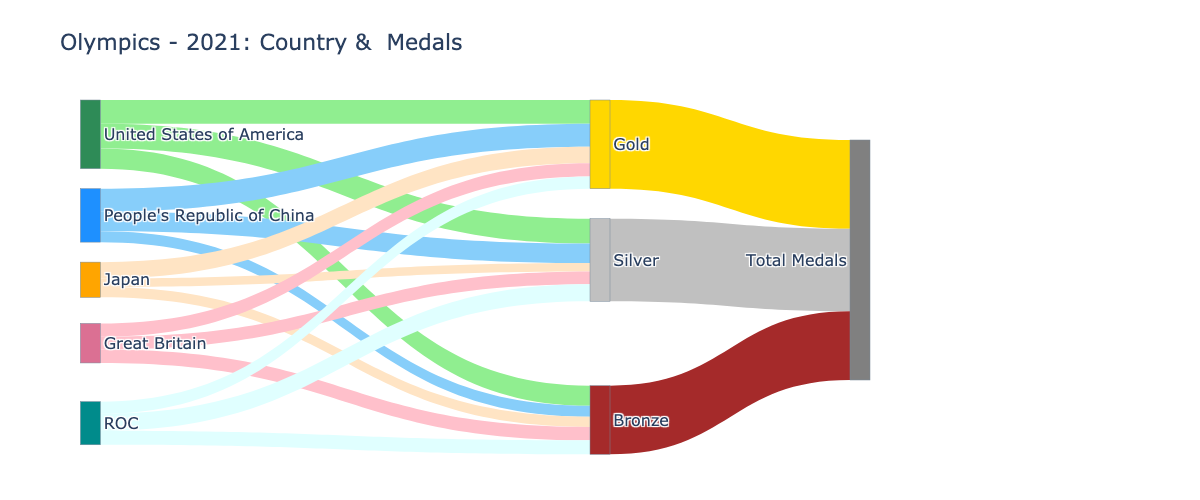

In [58]:

# Display the figure
NODES = dict(pad  = 20, thickness = 20, line  = dict(color = "lightslategrey", width = 0.5),hovertemplate=" ",
            label = node_labels, color = node_colors,
            x = node_x_pos, y = node_y_pos, )
LINKS = dict(source = source, target = target, value = link_values, 
            label = link_labels, color = link_colors,
            hovertemplate="%{label}",)
data = go.Sankey( arrangement='snap', node = NODES, link = LINKS)
fig = go.Figure(data)
fig.update_traces( valueformat='3d', valuesuffix=' Medals', selector=dict(type='sankey'))
fig.update_layout(title="Olympics - 2021: Country &  Medals",  font_size=16,  width=1200,height=500,)
fig.update_layout(hoverlabel=dict( bgcolor="grey", font_size=14, font_family="Rockwell"))
fig.show("png") # fig.show()

## Summary
We saw how Sankey diagrams can be used to represent flows effectively and how plotly python library can be to generate Sankey diagrams for a sample dataset.